In [1]:
import pandas as pd
import re
import glob, os
import math
import sys
import matplotlib.pyplot as plt
from collections import defaultdict

cwmetfolder="/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/diffq/BL14diffq/BL14q.01_atleast.2"
fragsize=170


In [2]:
class cellTypeProfile:
    def __init__(self, ctf,fsize,outname,**kwargs):
        self.ctname=determineCT(ctf)
        self.frag=fsize
        self.outname=outname
        
        self.ctdf=pd.read_csv(ctf, sep="\t")
        self.setotherinfos()
    
    def setotherinfos(self):
        self.ctdf['DMRlength']=self.ctdf['end']-self.ctdf['start']
        self.ctdf['reporter']=1.0*self.ctdf['DMRlength']/self.frag
        self.ctdf['cpg_per_reporter']=1.0*self.ctdf['#cpg']/self.ctdf['reporter']
        
        self.totalDMR=self.ctdf.shape[0]
        self.totalReporter=self.ctdf['reporter'].sum()
        
        self.avgCpGperDMR=self.ctdf['#cpg'].mean()
        self.avgCpGperReporter=self.ctdf['cpg_per_reporter'].mean()
        
        self.ctdf['total_reporter']=self.totalReporter
        
        self.ctdf['avg_cpg_per_DMR']=self.avgCpGperDMR
        self.ctdf['avg_cpg_per_reporter']=self.avgCpGperReporter
        
        
        self.ctdf.to_csv(self.outname,sep="\t",index=False)
        
        
        
        
        
        
        
        histcols=['DMRlength','reporter','#cpg','cpg_per_reporter']
        
      
        
        #########plot the histograms##################
        fig, axs = plt.subplots(1, len(histcols), figsize=(len(histcols)*5, 10))
        for i in range(len(histcols)):
            self.ctdf.hist(column=histcols[i], ax=axs[i])
        
        #plt.show()
        fig.savefig(self.outname + '_histogram.pdf',dpi=300, bbox_inches='tight')
        
        
        
      
        
        
        
     

        
        #fig.savefig(self.outname+'demo-file.pdf',dpi=300, bbox_inches='tight')
        
        
       
        
        

In [3]:


def determineCT(fname):

    m = re.search('g1_(.+?)_\d+_g2', fname)
    if m:
        found = m.group(1)

    else:
        print("cell type not found", fname)
        print("exiting")

        sys.exit(1)

    celltype = found
    
  
    
    
    
    return celltype

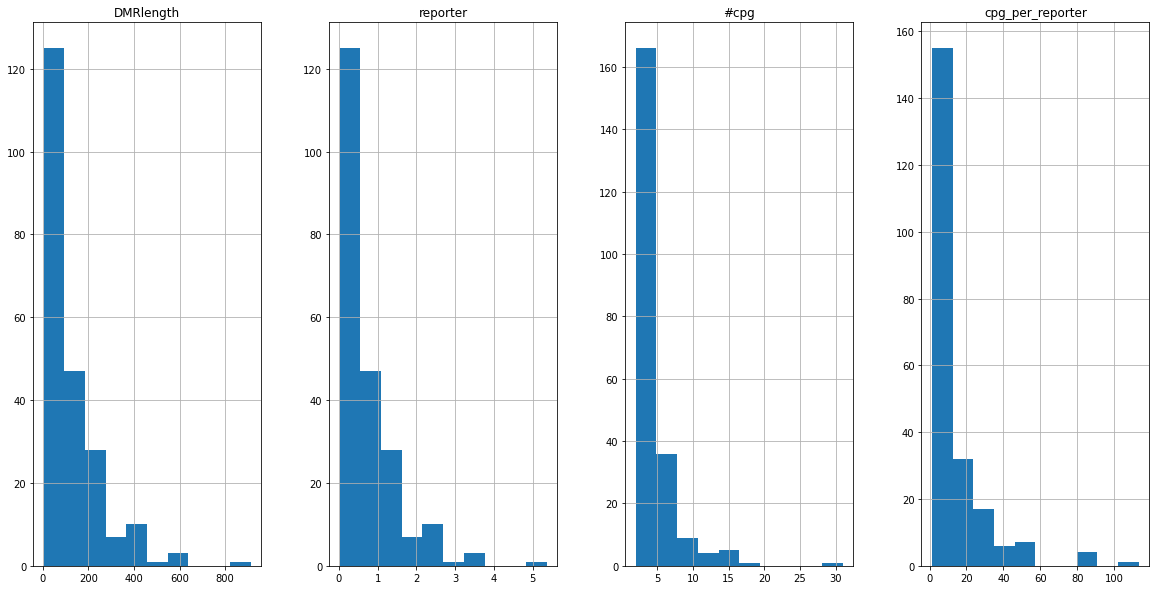

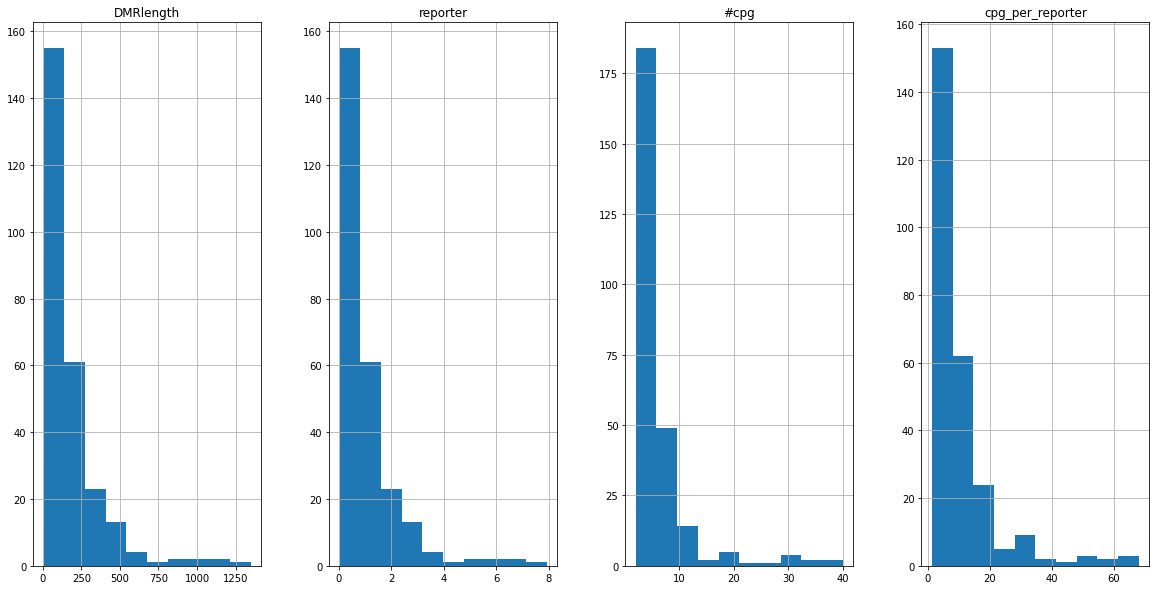

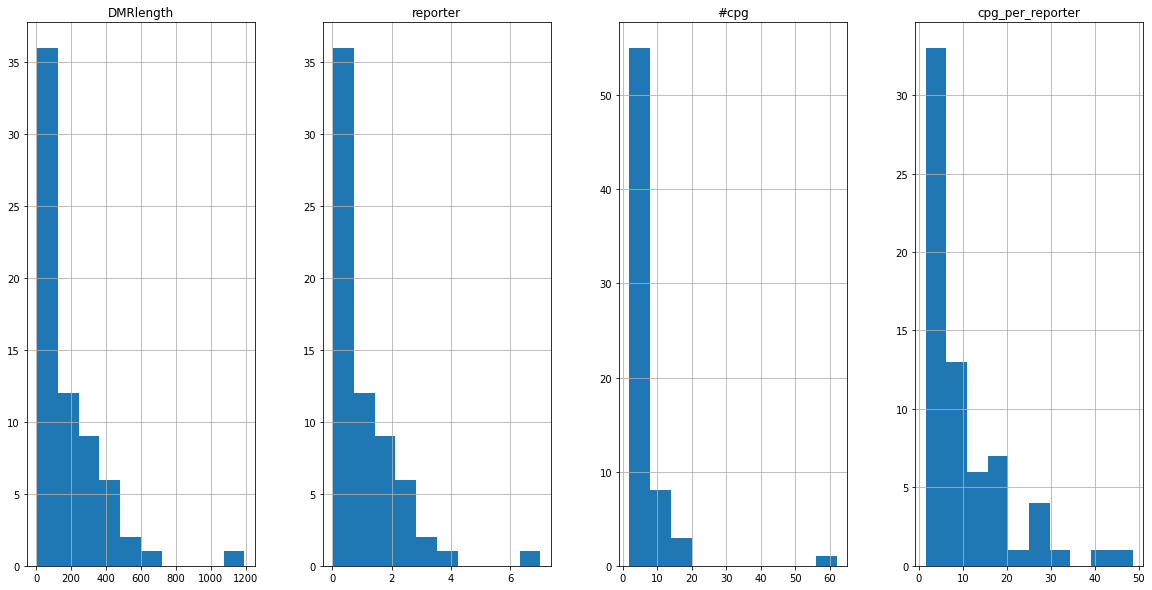

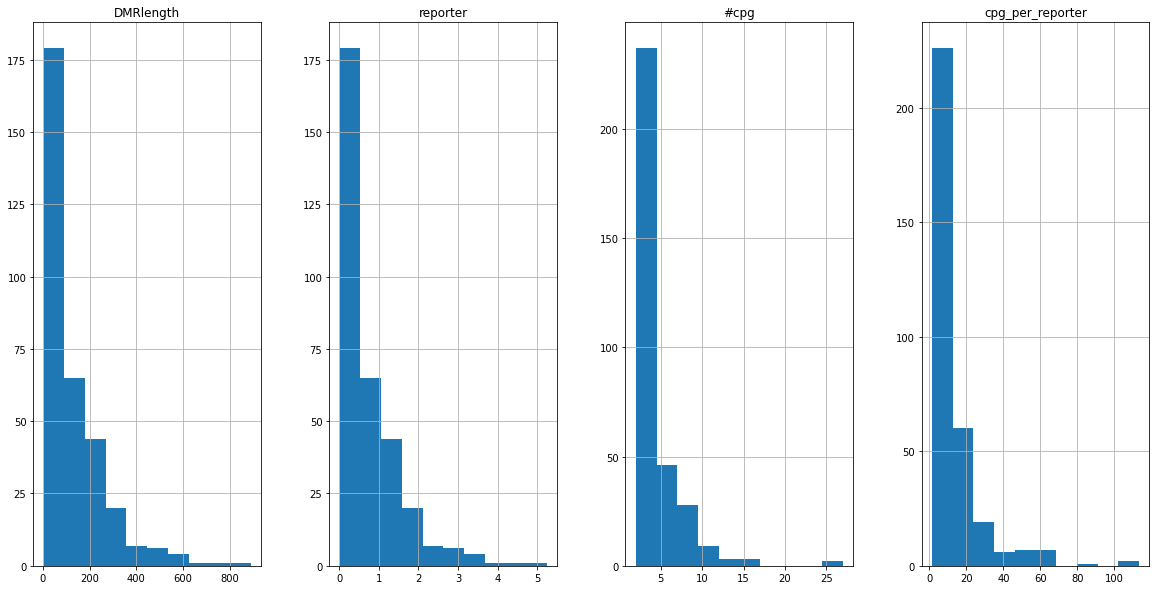

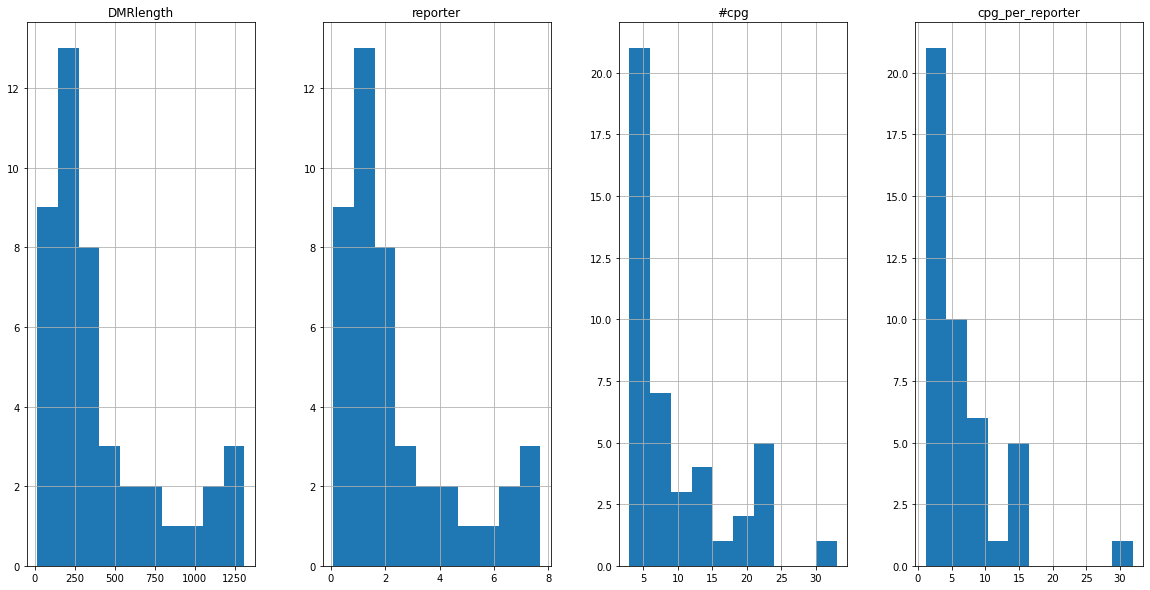

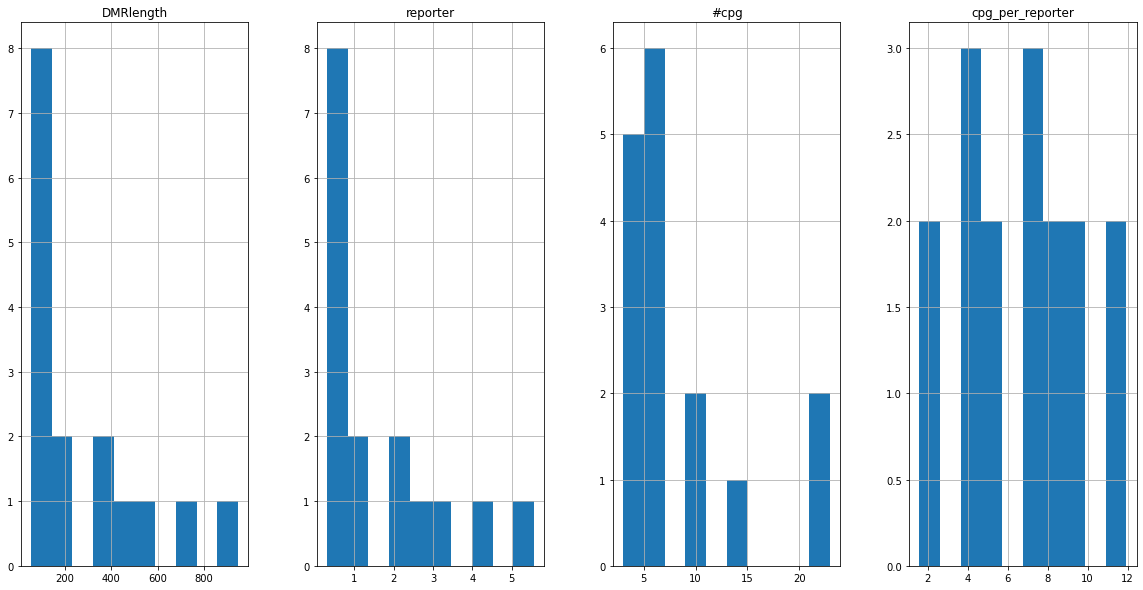

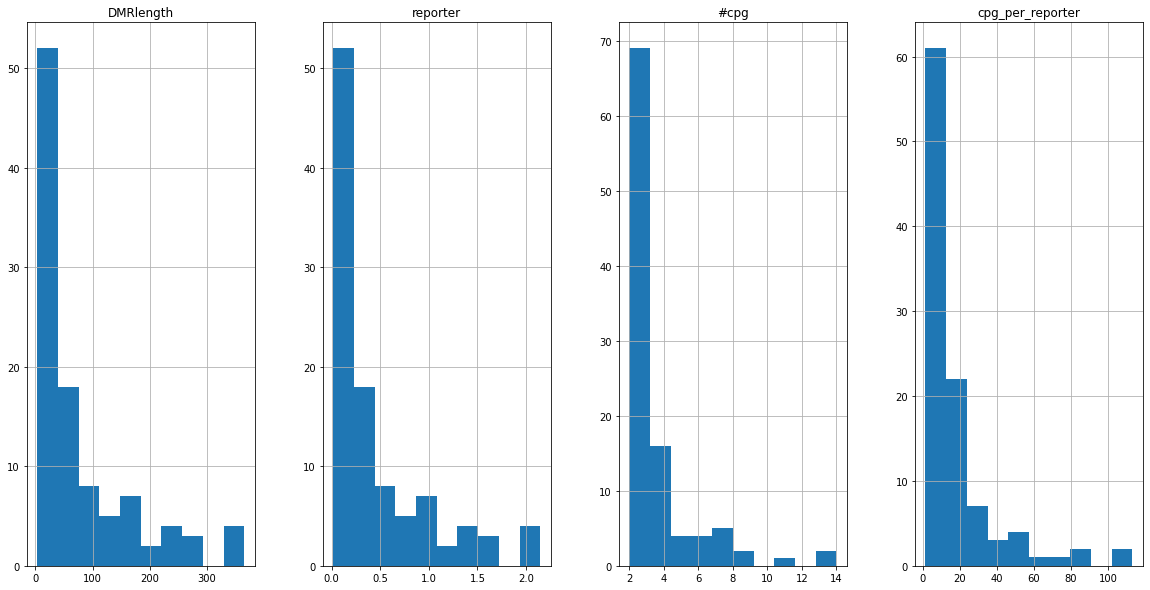

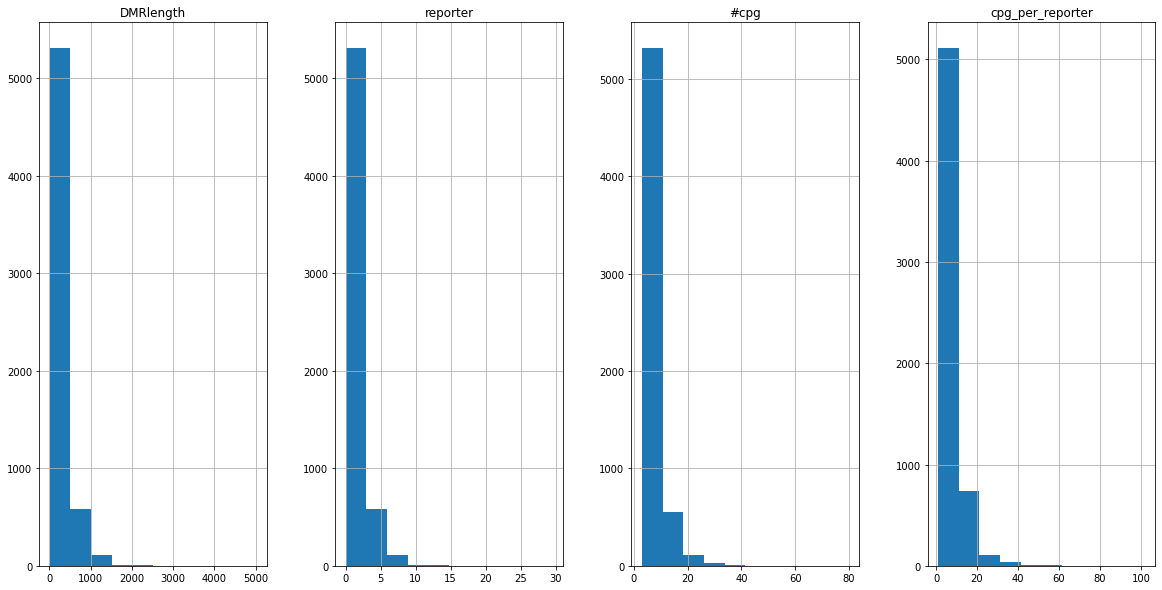

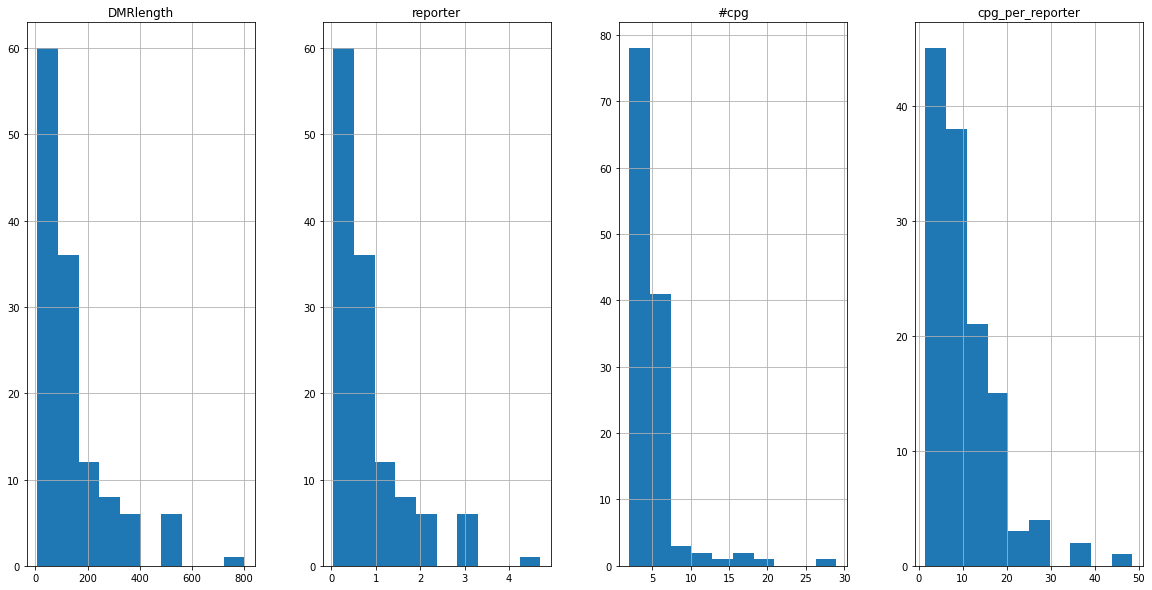

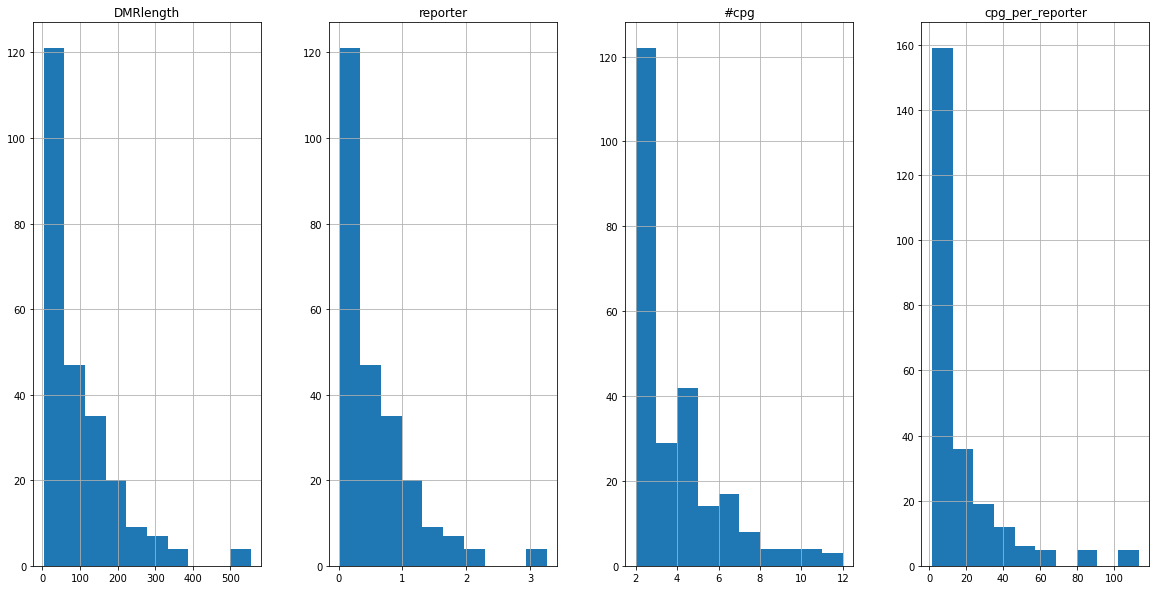

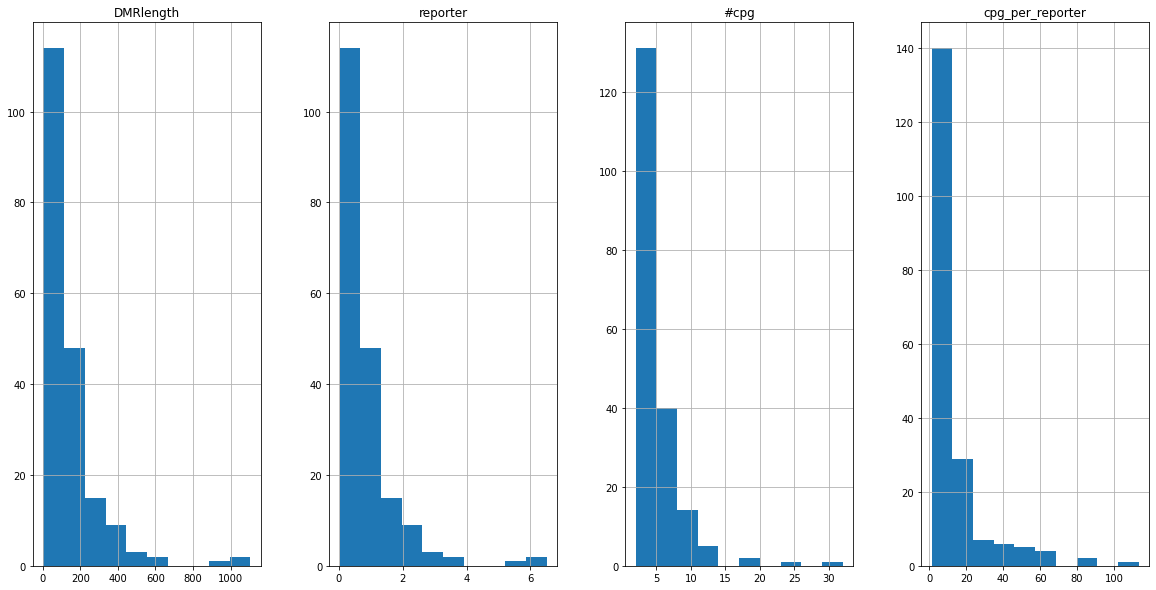

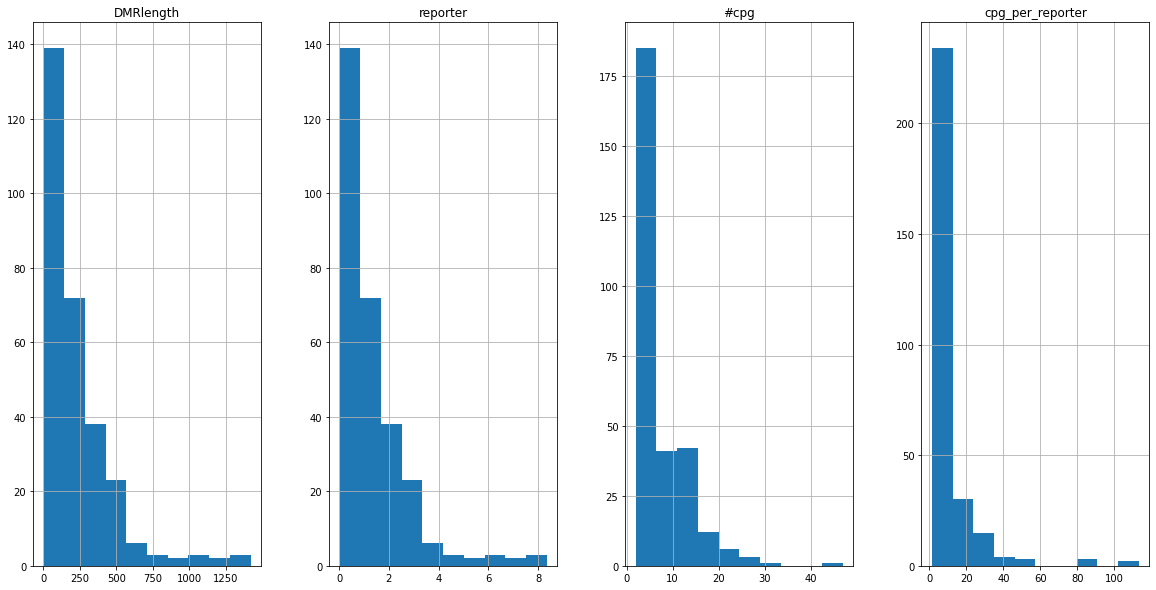

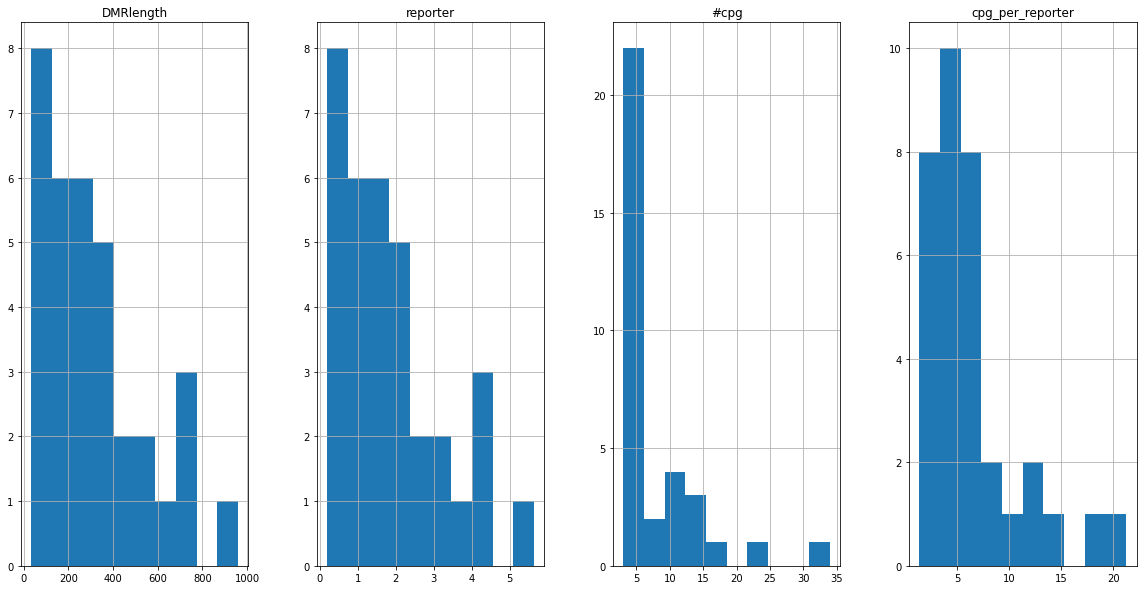

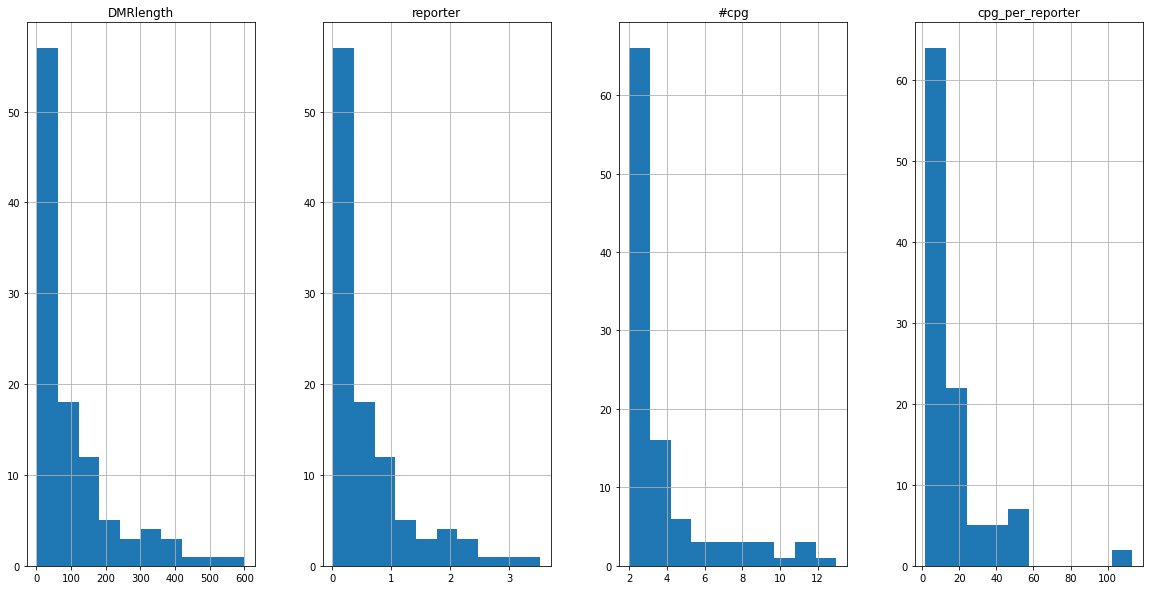

In [4]:

outdir=cwmetfolder+"_stats"
if not os.path.exists(outdir):
    os.makedirs(outdir)
else:
    print("folder exist. Exiting")
    sys.exit(1)


files = glob.glob(cwmetfolder+'/*.txt')

ctprofiledict=defaultdict(list)
for file in files:
    outfile=outdir+"/"+os.path.basename(file)
    ctp=cellTypeProfile(file,fragsize,outfile)
    ctprofiledict['celltype'].append(ctp.ctname)
    ctprofiledict['total_reporter'].append(ctp.totalReporter)
    ctprofiledict['avg_cpg_per_reporter'].append(ctp.avgCpGperReporter)
    ctprofiledict['total_DMR'].append(ctp.totalDMR)
    ctprofiledict['avg_cpg_per_DMR'].append(ctp.avgCpGperDMR)
    

    

summarydf=pd.DataFrame.from_dict(ctprofiledict)

summarydf.to_csv(outdir+"/summary.txt",sep="\t",index=False)
   

    
    

In [5]:
print("done")

done
